In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [76]:
# defining sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [77]:
# logreg class
def logistic_regression(X, y, learning_rate, num_iterations):
    m,n = X.shape
    theta = np.zeros(n)
    costs = []

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta -= learning_rate * gradient
        costs.append(cost)

    return theta, costs

In [78]:
# prepare data
X = df.drop(columns=['target'])
y = df['target']
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X]

In [79]:
split_ratio = 0.8
split_index = int(split_ratio * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [80]:
# training the model
learning_rate = 0.01
num_iterations = 1000
theta, costs = logistic_regression(X_train, y_train, learning_rate, num_iterations)

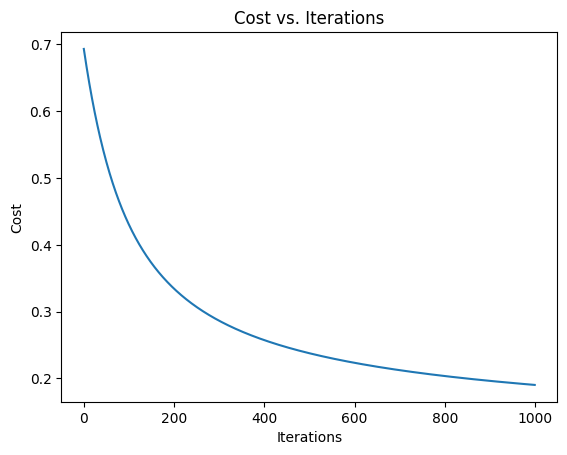

In [81]:
# just a simple plot to show the cost vs iterations over time of training
# used chatgpt for this graph
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [82]:
def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= 0.5).astype(int)

In [83]:
y_pred = predict(X_test, theta)

In [84]:
accuracy = np.mean(y_pred == y_test) * 100
print(f'Accuracy: {accuracy:.2f}%')

# f1 score added
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

Accuracy: 91.50%
F1 Score: 0.93
